In [ ]:
import pandas as pd
import pyreadstat
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

In [ ]:
df = pd.read_stata("DM_Kapitasi.dta", convert_categoricals=False)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188324 entries, 0 to 1188323
Data columns (total 41 columns):
 #   Column  Non-Null Count    Dtype         
---  ------  --------------    -----         
 0   PSTV01  1188324 non-null  float64       
 1   PSTV02  1188324 non-null  float64       
 2   PSTV15  1188324 non-null  float64       
 3   FKP02   1188324 non-null  object        
 4   FKP03   1188324 non-null  datetime64[ns]
 5   FKP04   1188324 non-null  datetime64[ns]
 6   FKP05   1188324 non-null  float64       
 7   FKP06   1188324 non-null  float64       
 8   FKP07   1188324 non-null  float64       
 9   FKP08   1188324 non-null  float64       
 10  FKP09   1188324 non-null  float64       
 11  FKP10   1188324 non-null  float64       
 12  FKP11   1188324 non-null  float64       
 13  FKP12   1188324 non-null  float64       
 14  FKP13   1188324 non-null  float64       
 15  FKP14   1188324 non-null  float64       
 16  FKP14A  1188324 non-null  object        
 17  FKP15   

In [ ]:
# fkp05map
regions_dict = {
    11: "Aceh",
    12: "Sumatera Utara",
    13: "Sumatera Barat",
    14: "Riau",
    15: "Jambi",
    16: "Sumatera Selatan",
    17: "Bengkulu",
    18: "Lampung",
    19: "Kepulauan Bangka Belitung",
    21: "Kepulauan Riau",
    31: "DKI Jakarta",
    32: "Jawa Barat",
    33: "Jawa Tengah",
    34: "DI Yogyakarta",
    35: "Jawa Timur",
    36: "Banten",
    51: "Bali",
    52: "Nusa Tenggara Barat",
    53: "Nusa Tenggara Timur",
    61: "Kalimantan Barat",
    62: "Kalimantan Tengah",
    63: "Kalimantan Selatan",
    64: "Kalimantan Timur",
    65: "Kalimantan Utara",
    71: "Sulawesi Utara",
    72: "Sulawesi Tengah",
    73: "Sulawesi Selatan",
    74: "Sulawesi Tenggara",
    75: "Gorontalo",
    76: "Sulawesi Barat",
    81: "Maluku",
    82: "Maluku Utara",
    91: "Papua Barat",
    94: "Papua"
}

In [ ]:
df['FKP05'] = df['FKP05'].map(regions_dict)

# 1. Persebaran Diagnosis DM / Daerah

In [ ]:
df_diagnosis_prov = df.groupby(['FKP14A','FKP15A','FKP05']).size().reset_index(name = 'count')
df_diagnosis_prov = df_diagnosis_prov[df_diagnosis_prov['FKP15A'] != '9999']
df_diagnosis_prov = df_diagnosis_prov[df_diagnosis_prov['FKP14A'] == 'E11']
df_diagnosis_prov = df_diagnosis_prov.sort_values('count', ascending = False)
df_diagnosis_prov.head(10)

,FKP14A,FKP15A,FKP05,count
4186,E11,Non-insulin-dependent diabetes mellitus withou...,Jawa Tengah,60089
3847,E11,Non-insulin-dependent diabetes mellitus,Jawa Tengah,24191
4187,E11,Non-insulin-dependent diabetes mellitus withou...,Jawa Timur,23616
3848,E11,Non-insulin-dependent diabetes mellitus,Jawa Timur,17214
4152,E11,Non-insulin-dependent diabetes mellitus with u...,Jawa Tengah,11755
4153,E11,Non-insulin-dependent diabetes mellitus with u...,Jawa Timur,9612
4185,E11,Non-insulin-dependent diabetes mellitus withou...,Jawa Barat,9308
3846,E11,Non-insulin-dependent diabetes mellitus,Jawa Barat,8753
3871,E11,Non-insulin-dependent diabetes mellitus,Sumatera Utara,7083
4181,E11,Non-insulin-dependent diabetes mellitus withou...,DI Yogyakarta,6660


In [ ]:
# ekstrak tahun dari tanggal kunjungan
df['Tahun'] = df['FKP03'].dt.strftime("%Y")

In [ ]:
df_kunjungan = df.groupby(['Tahun']).size().reset_index(name = 'count')
df_kunjungan

,Tahun,count
0,2021,1188324


In [ ]:
kesehatan_dict = {
    1: "Puskesmas",
    2: "Klinik Pratama",
    3: "Dokter Umum",
    4: "Dokter gigi",
    5: "Laboratorium",
    6: "Lain-lain",
    7: "Jejaring"
}

In [ ]:
df['FKP08'] = df['FKP08'].map(kesehatan_dict)

# 2. Top Kunjungan Faskes pada DM Kapitasi

In [ ]:
df_kunjungan_faskes = df.groupby(['FKP08','Tahun']).size().reset_index(name = 'count')
df_kunjungan_faskes = df_kunjungan_faskes[df_kunjungan_faskes['Tahun'] > '2014']
df_kunjungan_faskes = df_kunjungan_faskes.sort_values('count', ascending = False)

<BarContainer object of 6 artists>

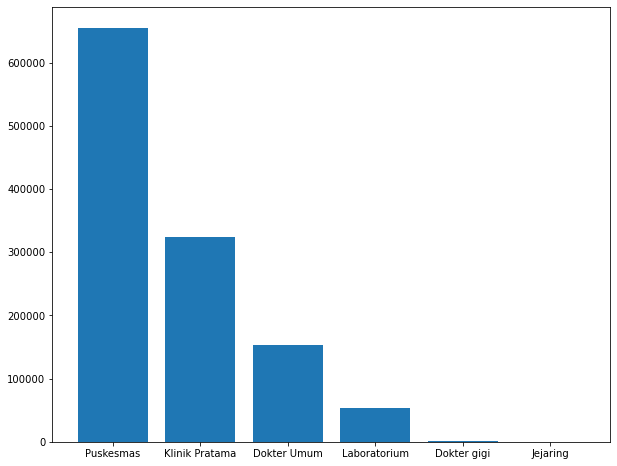

In [ ]:
plt.figure(figsize = (10,8))
x = df_kunjungan_faskes['FKP08']
y = df_kunjungan_faskes['count']

plt.bar(x,y)

In [ ]:
my_dict = {
    1 : 'Vertikal',
    2 : 'Pemprov',
    3 : 'Pemkab',
    4 : 'POLRI',
    5 : 'TNI AD',
    6 : 'TNI AL',
    7 : 'TNI AU',
    8 : 'BUMN',
    9 : 'Swasta'
}

In [ ]:
df['FKP07'] = df['FKP07'].map(my_dict)

# 3. Top 10 Kepemilikan Faskes

In [ ]:
df_kepemilikan = df.groupby(['FKP05','FKP07']).size().reset_index(name = 'count')
df_kepemilikan = df_kepemilikan.sort_values('count', ascending = False)
df_kepemilikan.head(10)

,FKP05,FKP07,count
61,Jawa Tengah,Swasta,135097
68,Jawa Timur,Pemkab,107222
59,Jawa Tengah,Pemkab,77964
70,Jawa Timur,Swasta,75241
33,DKI Jakarta,Pemkab,64975
52,Jawa Barat,Pemkab,53859
53,Jawa Barat,Swasta,51567
207,Sumatera Utara,Pemkab,38436
2,Aceh,Pemkab,33582
170,Sulawesi Selatan,Pemkab,25751


## 3.1. Persebaran Kepemilikan Faskes Pemprov

In [ ]:
df_kepemilikan_pemprov = df_kepemilikan[df_kepemilikan['FKP07'] == 'Pemprov']
df_kepemilikan_pemprov = df_kepemilikan_pemprov.sort_values('count', ascending = False)
df_kepemilikan_pemprov

,FKP05,FKP07,count
34,DKI Jakarta,Pemprov,19061
196,Sumatera Barat,Pemprov,116
165,Sulawesi Barat,Pemprov,105
178,Sulawesi Tengah,Pemprov,59
76,Kalimantan Barat,Pemprov,50
60,Jawa Tengah,Pemprov,21
123,Maluku,Pemprov,7
69,Jawa Timur,Pemprov,4
140,Nusa Tenggara Timur,Pemprov,3


## 3.2 Persebaran Kepemilikan Faskes Pemkab

In [ ]:
df_kepemilikan_pemkab = df_kepemilikan[df_kepemilikan['FKP07'] == 'Pemkab']
df_kepemilikan_pemkab = df_kepemilikan_pemkab.sort_values('count', ascending = False)
df_kepemilikan_pemkab

,FKP05,FKP07,count
68,Jawa Timur,Pemkab,107222
59,Jawa Tengah,Pemkab,77964
33,DKI Jakarta,Pemkab,64975
52,Jawa Barat,Pemkab,53859
207,Sumatera Utara,Pemkab,38436
2,Aceh,Pemkab,33582
170,Sulawesi Selatan,Pemkab,25751
195,Sumatera Barat,Pemkab,20815
26,DI Yogyakarta,Pemkab,17688
9,Bali,Pemkab,15929


## 3.3. Persebaran Kepemilikan Faskes Swasta

In [ ]:
df_kepemilikan_swasta = df_kepemilikan[df_kepemilikan['FKP07'] == 'Swasta\xa0']
df_kepemilikan_swasta = df_kepemilikan_swasta.sort_values('count', ascending = False)
df_kepemilikan_swasta

,FKP05,FKP07,count
61,Jawa Tengah,Swasta,135097
70,Jawa Timur,Swasta,75241
53,Jawa Barat,Swasta,51567
208,Sumatera Utara,Swasta,21504
27,DI Yogyakarta,Swasta,18139
17,Banten,Swasta,16521
203,Sumatera Selatan,Swasta,14731
159,Riau,Swasta,14188
10,Bali,Swasta,13346
197,Sumatera Barat,Swasta,12749


# 4. Distribusi Jenis Kunjungan FKTP Kapitasi DM

In [ ]:
dict_kunjungan = {
    1.0 : 'Kunjungan sakit',
    2.0 : 'Kunjungan sehat'

}

In [ ]:
df['FKP22'] = df['FKP22'].map(dict_kunjungan)

In [ ]:
df_kunjungan = df.groupby(['FKP22']).size().reset_index(name = 'count')
df_kunjungan

,FKP22,count
0,Kunjungan sakit,955621
1,Kunjungan sehat,232703


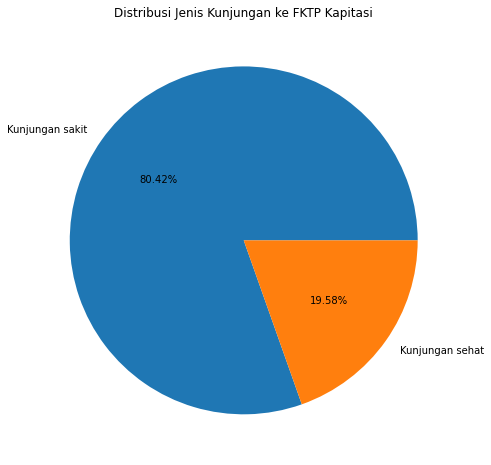

In [ ]:
keys = []
for a in df_kunjungan['FKP22']:
    keys.append(str(a))
value = []
for b in df_kunjungan['count']:
    value.append(b)

# plotting
plt.figure(figsize = (10,8))
plt.pie(value, labels = keys, autopct = '%.2f%%')
plt.title("Distribusi Jenis Kunjungan ke FKTP Kapitasi")
plt.show()

In [ ]:
df_rujukan = df.groupby(['FKP19','FKP20','FKP21']).size().reset_index(name = 'count')
df_rujukan = df_rujukan.sort_values('count', ascending = False)
# tanpa dirujuk
# top 10 dirujuk kemana

df_rujukan.head(10)

,FKP19,FKP20,FKP21,count
456,98.0,98.0,98.0,988822
264,1.0,34.0,36.0,43136
137,1.0,28.0,36.0,26288
301,1.0,35.0,36.0,11919
86,1.0,27.0,36.0,9862
266,1.0,34.0,40.0,8867
274,1.0,34.0,73.0,7772
88,1.0,27.0,40.0,4887
269,1.0,34.0,49.0,4684
212,1.0,33.0,36.0,3703


In [ ]:
# waktu kunjungan
df.groupby(['FKP03','FKP04']).size().reset_index(name = 'count')

,FKP03,FKP04,count
0,2021-01-01,2021-01-01,532
1,2021-01-01,2021-01-02,4
2,2021-01-01,2021-01-04,2
3,2021-01-01,2021-01-05,1
4,2021-01-02,2021-01-02,2415
...,...,...,...
1558,2021-12-30,2022-01-03,1
1559,2021-12-30,2022-01-04,1
1560,2021-12-31,2021-12-31,2190
1561,2021-12-31,2022-01-02,1


In [ ]:
df['waktu_kunjungan'] = df['FKP04'] - df['FKP03']

In [ ]:
df_waktu_kunjungan = df.groupby(['FKP05']).agg({'waktu_kunjungan' : 'mean'}).reset_index()
df_waktu_kunjungan

,FKP05,waktu_kunjungan
0,Aceh,0 days 00:22:50.721760369
1,Bali,0 days 00:00:22.408818284
2,Banten,0 days 00:02:16.233830700
3,Bengkulu,0 days 00:07:54.435631482
4,DI Yogyakarta,0 days 00:01:18.162179944
5,DKI Jakarta,0 days 00:00:35.819446691
6,Gorontalo,0 days 00:05:09.371527349
7,Jambi,0 days 00:09:35.223904256
8,Jawa Barat,0 days 00:03:24.227357354
9,Jawa Tengah,0 days 00:03:14.848190766


In [ ]:
df_waktu_kunjungan['waktu_kunjungan'] = df_waktu_kunjungan['waktu_kunjungan'].astype(str)

In [ ]:
df_waktu_kunjungan['waktu_kunjungan'] = df_waktu_kunjungan['waktu_kunjungan'].str.split(' ', 1).str[1]
df_waktu_kunjungan['waktu_kunjungan'] = df_waktu_kunjungan['waktu_kunjungan'].str.split(':', 2).str[0:2]

In [ ]:
df_waktu_kunjungan['waktu_kunjungan'] = df_waktu_kunjungan['waktu_kunjungan'].apply(lambda x: str(x).replace('days', '').replace(', ', ':' ).replace('[', '').replace(']', ''))

In [ ]:
df_waktu_kunjungan['waktu_kunjungan'] = df_waktu_kunjungan['waktu_kunjungan'].str.replace("'", "")
df_waktu_kunjungan = df_waktu_kunjungan.sort_values('waktu_kunjungan', ascending = False)
df_waktu_kunjungan

,FKP05,waktu_kunjungan
21,Nusa Tenggara Barat,00:41
26,Sulawesi Barat,00:29
28,Sulawesi Tengah,00:26
18,Lampung,00:23
0,Aceh,00:22
27,Sulawesi Selatan,00:18
15,Kalimantan Utara,00:17
20,Maluku Utara,00:13
11,Kalimantan Barat,00:12
23,Papua,00:12


In [ ]:
# waktu kunjungan faskes
df_waktu_faskes = df.groupby(['FKP08']).agg({'waktu_kunjungan' : 'mean'}).reset_index()
df_waktu_faskes

,FKP08,waktu_kunjungan
0,Dokter Umum,0 days 00:00:01.684955015
1,Dokter gigi,0 days 00:00:00
2,Jejaring,0 days 02:07:03.529411764
3,Klinik Pratama,0 days 00:07:01.485508475
4,Laboratorium,0 days 00:00:00
5,Puskesmas,0 days 00:09:09.098063037


In [ ]:
df_waktu_faskes['waktu_kunjungan'] = df_waktu_faskes['waktu_kunjungan'].astype(str)

In [ ]:
df_waktu_faskes['waktu_kunjungan'] = df_waktu_faskes['waktu_kunjungan'].str.split(' ', 1).str[1]
df_waktu_faskes['waktu_kunjungan'] = df_waktu_faskes['waktu_kunjungan'].str.split(':', 2).str[0:2]

In [ ]:
df_waktu_faskes['waktu_kunjungan'] = df_waktu_faskes['waktu_kunjungan'].apply(lambda x: str(x).replace('days', '').replace(', ', ':' ).replace('[', '').replace(']', ''))

In [ ]:
df_waktu_faskes['waktu_kunjungan'] = df_waktu_faskes['waktu_kunjungan'].str.replace("'", "")
df_waktu_faskes = df_waktu_faskes.sort_values('waktu_kunjungan', ascending = False)
df_waktu_faskes

,FKP08,waktu_kunjungan
2,Jejaring,02:07
5,Puskesmas,00:09
3,Klinik Pratama,00:07
0,Dokter Umum,00:00
1,Dokter gigi,00:00
4,Laboratorium,00:00


In [ ]:
fkp11_dict = {
    1: "POLI UMUM",
    2: "POLI GIGI & MULUT",
    3: "POLI KIA",
    4: "UGD",
    5: "POLI KB",
    6: "POLI PERSALINAN",
    7: "LABORATORIUM",
    8: "Penyakit Dalam",
    9: "POLI REFRAKSI",
    10: "Fisio",
    11: "Imunisasi",
    12: "Home-Visit",
    13: "Konseling",
    14: "POLI LANSIA",
    15: "Umum Anak",
    16: "Telp/SMS",
    17: "Imunisasi (BCG)",
    18: "Imunisasi (DPT)",
    19: "Imunisasi (Polio)",
    20: "Imunisasi (Campak)",
    21: "Imunisasi (Hep B)",
    22: "POLI DIABETES",
    23: "POLI GIZI",
    24: "POLI HIV & IMS",
    25: "POLI JIWA",
    26: "POLI KUSTA",
    27: "POLI TB & PARU",
    28: "KUNJUNGAN ONLINE"
}

In [ ]:
df['FKP11'] = df['FKP11'].map(fkp11_dict)

In [ ]:
df_poli = df.groupby(['FKP11']).size().reset_index(name = 'count')
df_poli_banyak = df_poli.sort_values('count', ascending = False).head(10)
df_poli_dikit = df_poli.sort_values('count').head(10)

In [ ]:
df_poli_dikit

,FKP11,count
11,POLI HIV & IMS,3
4,Imunisasi (Hep B),12
12,POLI JIWA,19
16,POLI PERSALINAN,25
5,Imunisasi (Polio),31
10,POLI GIZI,32
2,Imunisasi (Campak),32
3,Imunisasi (DPT),82
17,POLI REFRAKSI,99
1,Imunisasi (BCG),138


# 6. Top 10 Terkecil Jenis Poli

<BarContainer object of 10 artists>

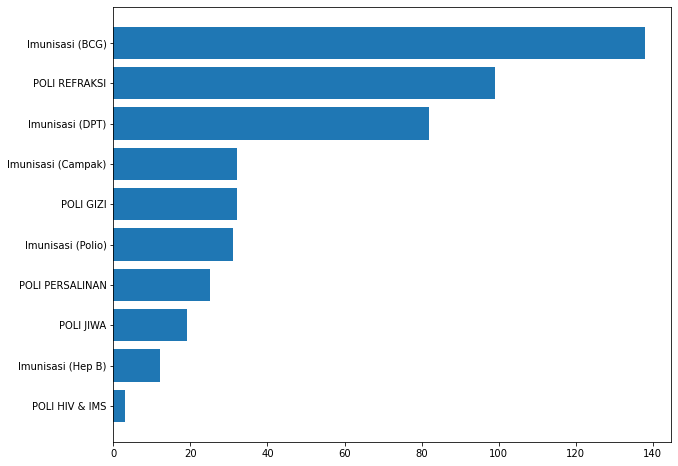

In [ ]:
plt.figure(figsize = (10,8))
x = df_poli_dikit['FKP11']
y = df_poli_dikit['count']

plt.barh(x,y)

## 6.1 Top 10 Terbesar Jenis Poli

In [ ]:
df_poli_banyak

,FKP11,count
0,1.0,801248
9,13.0,159112
6,7.0,86434
8,12.0,58641
10,14.0,26683
21,30.0,19876
22,31.0,14538
1,2.0,11766
3,4.0,6001
16,22.0,1448


<BarContainer object of 10 artists>

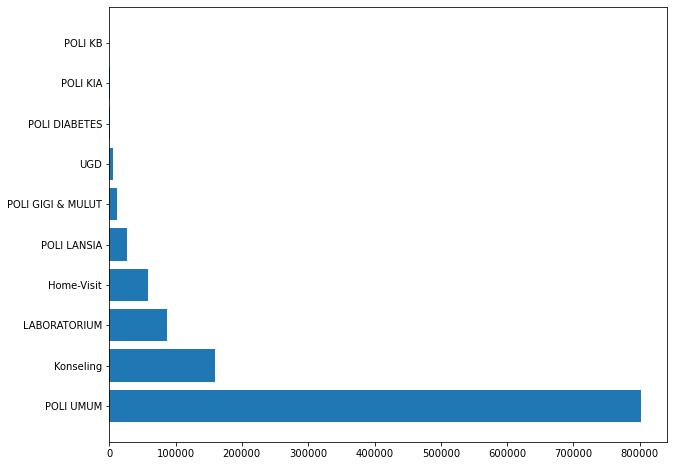

In [ ]:
plt.figure(figsize = (10,8))
x = df_poli_banyak['FKP11']
y = df_poli_banyak['count']

plt.barh(x,y)

In [ ]:
df_prov = df[df['FKP16'] != 98.0]
df_prov['FKP16'].unique()

array([35., 16., 32., 13., 33., 11., 19., 31., 72., 64., 14., 73., 53.,
       12., 17., 63., 61., 34., 18., 52., 36., 71., 82., 91., 51., 62.,
       74., 15., 94., 21., 65., 81., 75., 76.])

In [ ]:
len(df_prov)

199502

In [ ]:
len(dalam_prov)

198403

In [ ]:
dalam_prov = df_prov[df_prov['FKP05'] == df_prov['FKP16']]
dalam_prov

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,...,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV16,PSTV17,PSTV18
3,968.0,968.0,13.006498,386310921Y001008,2021-09-24,2021-09-24,35.0,3578.0,3.0,1.0,...,4.0,35.0,3578.0,3.0,1.0,35.0,3578.0,2021.0,1.0,NaN
4,968.0,968.0,13.006498,386310621Y001373,2021-06-23,2021-06-23,35.0,3578.0,3.0,1.0,...,4.0,35.0,3578.0,3.0,1.0,35.0,3578.0,2021.0,1.0,NaN
5,968.0,968.0,13.006498,386311221Y001341,2021-12-27,2021-12-27,35.0,3578.0,3.0,1.0,...,4.0,35.0,3578.0,3.0,1.0,35.0,3578.0,2021.0,1.0,NaN
6,968.0,968.0,13.006498,386310321Y001174,2021-03-24,2021-03-24,35.0,3578.0,3.0,1.0,...,4.0,35.0,3578.0,3.0,1.0,35.0,3578.0,2021.0,1.0,NaN
22,2535.0,29991673.0,5.803837,235420621P000228,2021-06-07,2021-06-07,16.0,1609.0,9.0,2.0,...,5.0,16.0,1609.0,9.0,2.0,16.0,1609.0,2021.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1188318,455357481.0,455357481.0,14.104879,386230421Y000676,2021-04-19,2021-04-19,35.0,3578.0,3.0,1.0,...,4.0,35.0,3578.0,3.0,1.0,35.0,3578.0,2021.0,1.0,NaN
1188319,455357481.0,455357481.0,14.104879,386231021Y000684,2021-10-21,2021-10-21,35.0,3578.0,3.0,1.0,...,4.0,35.0,3578.0,3.0,1.0,35.0,3578.0,2021.0,1.0,NaN
1188320,455386814.0,455386814.0,7.352901,384490121P000131,2021-01-22,2021-01-22,33.0,3314.0,9.0,3.0,...,4.0,33.0,3314.0,9.0,3.0,33.0,3314.0,2021.0,2.0,2021.0
1188321,455386814.0,455386814.0,7.352901,384490621P000042,2021-06-07,2021-06-07,33.0,3314.0,9.0,3.0,...,4.0,33.0,3314.0,9.0,3.0,33.0,3314.0,2021.0,2.0,2021.0


In [ ]:
luar_prov = df_prov[df_prov['FKP05'] != df_prov['FKP16']]
dalam_prov = df_prov[df_prov['FKP05'] == df_prov['FKP16']]

In [ ]:
berobat_dalam_prov = len(dalam_prov) / len(df_prov)

In [ ]:
berobat_dalam_prov = berobat_dalam_prov * 100

# 7. Persentase orang Berobat di dalam Provinsi

In [ ]:
berobat_dalam_prov

99.44912832954056

In [ ]:
rounded_value = round(berobat_dalam_prov, 2)

In [ ]:
print("Persentase orang yang berobat dalam Provinsi adalah sebesar " + str(rounded_value) + '%')

Persentase orang yang berobat dalam Provinsi adalah sebesar 99.45%


In [ ]:
luar_prov

,PSTV01,PSTV02,PSTV15,FKP02,FKP03,FKP04,FKP05,FKP06,FKP07,FKP08,...,PSTV08,PSTV09,PSTV10,PSTV11,PSTV12,PSTV13,PSTV14,PSTV16,PSTV17,PSTV18
3961,400047.0,62100067.0,13.543665,355131021P000285,2021-10-08,2021-10-08,31.0,3172.0,9.0,2.0,...,5.0,32.0,3275.0,9.0,2.0,31.0,3172.0,2021.0,1.0,NaN
3963,400047.0,62100067.0,13.543665,355131121P001122,2021-11-24,2021-11-24,31.0,3172.0,9.0,2.0,...,5.0,32.0,3275.0,9.0,2.0,31.0,3172.0,2021.0,1.0,NaN
7503,677506.0,677506.0,11.783113,389590621P000497,2021-06-21,2021-06-21,35.0,3521.0,3.0,1.0,...,3.0,35.0,3521.0,3.0,1.0,35.0,3521.0,2021.0,1.0,NaN
7504,677506.0,677506.0,11.783113,389590921P000407,2021-09-20,2021-09-20,35.0,3521.0,3.0,1.0,...,3.0,35.0,3521.0,3.0,1.0,35.0,3521.0,2021.0,1.0,NaN
7505,677506.0,677506.0,11.783113,389590221P000524,2021-02-23,2021-02-23,35.0,3521.0,3.0,1.0,...,3.0,35.0,3521.0,3.0,1.0,35.0,3521.0,2021.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1180190,445781001.0,445781001.0,13.086662,160710421P000462,2021-04-10,2021-04-10,32.0,3276.0,3.0,1.0,...,4.0,31.0,3171.0,3.0,1.0,32.0,3276.0,2021.0,1.0,NaN
1180191,445781001.0,445781001.0,13.086662,160710721P000642,2021-07-22,2021-07-22,32.0,3276.0,3.0,1.0,...,4.0,31.0,3171.0,3.0,1.0,32.0,3276.0,2021.0,1.0,NaN
1180192,445781001.0,445781001.0,13.086662,160710121P000304,2021-01-09,2021-01-09,32.0,3276.0,3.0,1.0,...,4.0,31.0,3171.0,3.0,1.0,32.0,3276.0,2021.0,1.0,NaN
1180193,445781001.0,445781001.0,13.086662,160711021P001080,2021-10-16,2021-10-16,32.0,3276.0,3.0,1.0,...,4.0,31.0,3171.0,3.0,1.0,32.0,3276.0,2021.0,1.0,NaN


In [ ]:
prov_luar_dict = {
    13.0: "Sumatera Barat",
    14.0: "Riau",
    15.0: "Jambi",
    16.0: "Sumatera Selatan",
    17.0: "Bengkulu",
    21.0: "Kepulauan Riau",
    31.0: "DKI Jakarta",
    32.0: "Jawa Barat",
    33.0: "Jawa Tengah",
    34.0: "DI Yogyakarta",
    35.0: "Jawa Timur",
    36.0: "Banten",
    63.0: "Kalimantan Selatan",
    64.0: "Kalimantan Timur",
    72.0: "Sulawesi Tengah"
}

In [ ]:
luar_prov['FKP16'] = luar_prov['FKP16'].map(prov_luar_dict)

C:\Users\RZHD ID\AppData\Local\Temp\ipykernel_3740\3221240093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  luar_prov['FKP16'] = luar_prov['FKP16'].map(prov_luar_dict)


# 8. Distribusi Daerah yang menjadi tempat Rujukan di luar Provinsi Peserta

In [ ]:
prov_luar = luar_prov.groupby(['FKP16']).size().reset_index(name = 'count')
prov_luar = prov_luar.sort_values('count', ascending = False)
prov_luar

,FKP16,count
0,Banten,268
5,Jawa Barat,227
6,Jawa Tengah,214
2,DI Yogyakarta,121
3,DKI Jakarta,121
10,Kepulauan Riau,33
14,Sumatera Selatan,29
7,Jawa Timur,27
12,Sulawesi Tengah,22
8,Kalimantan Selatan,15
